In [240]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import LeaveOneOut, train_test_split, KFold, cross_val_score
from sklearn.metrics import roc_auc_score, balanced_accuracy_score
from sklearn.metrics import r2_score
from sklearn.ensemble import VotingClassifier

# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [262]:
df = pd.read_csv("cleaned_chatelet.csv")
df['DATE'] = pd.to_datetime(df['DATE'])
df = df[1000:10000]

In [263]:
df.NO.unique()

array([  4., 104.,   5.,  10.,  39.,  81.,  85.,  55.,  51.,  61.,  26.,
        59.,  50.,  43.,  69.,  83.,  80.,  25.,  14.,  12.,   8.,   7.,
        18.,  41.,  65.,  49.,  32.,  19.,  33.,  29.,  23.,  28.,  17.,
        13.,  16.,  58.,  79.,  88.,  66.,  64.,  63.,  54.,  42.,  45.,
        47.,  37.,  38.,  11.,   6.,   9.,  15.,  35.,  22.,  36.,  52.,
        34.,  21.,  24.,  30.,  91., 114., 142., 137., 157., 122.,  75.,
        73.,  40.,  20.,   3.,  99., 128., 116., 149., 174., 112., 138.,
       141., 167.,  94.,  90.,  77.,  67., 126., 169., 172., 113.,  78.,
        48.,  44., 166., 244., 217., 123., 111., 110.,  84.,  86.,  74.,
        46.,  31., 115., 103.,  72.,  62.,  27.,  60.,  89.,  87.,  93.,
       170., 209.,  98.,  70.,  95., 201., 223., 768., 136., 143.,   2.,
        96., 181., 147., 163., 106., 105., 188., 140., 247., 277., 314.,
       117., 144., 132.,  82.,  97., 135., 179., 146.,  92.,  71., 102.,
        56., 124.,  68., 159., 153., 252., 349., 39

<AxesSubplot: >

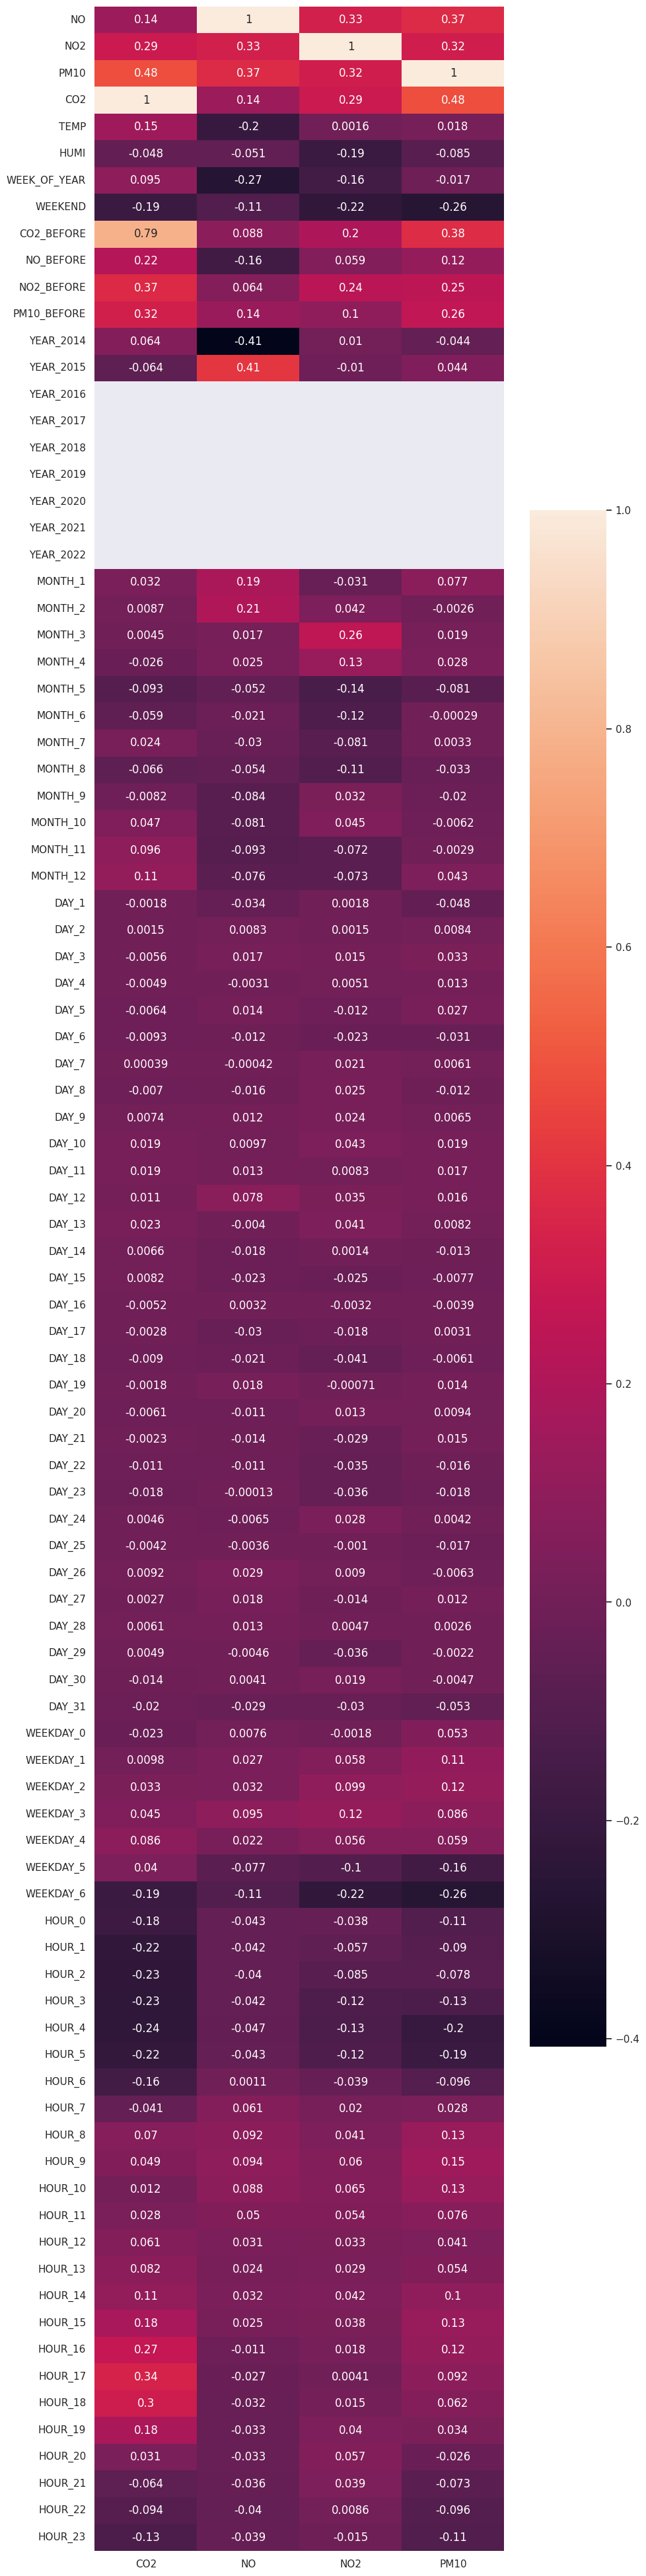

In [264]:
sns.set(rc={'figure.figsize':(10,50)})
sns.heatmap(df.corr()[['CO2', 'NO', 'NO2', 'PM10']], annot=True)

# Question 1

In [243]:
df_co2 = df.drop(columns=['NO', 'NO2', 'PM10', 'DATE', 'NO_BEFORE', 'NO2_BEFORE', 'PM10_BEFORE'])
# df_co2 = df_co2.set_index('DATE')
df_co2

,CO2,TEMP,HUMI,WEEK_OF_YEAR,WEEKEND,CO2_BEFORE,YEAR_2014,YEAR_2015,YEAR_2016,YEAR_2017,...,HOUR_14,HOUR_15,HOUR_16,HOUR_17,HOUR_18,HOUR_19,HOUR_20,HOUR_21,HOUR_22,HOUR_23
0,635.0,19.9,46.3,1,0,776.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,738.0,20.0,46.9,1,0,800.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,775.0,20.1,46.5,1,0,799.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,664.0,19.8,45.3,1,0,715.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,560.0,19.6,44.3,1,0,622.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,634.0,20.0,43.7,7,0,694.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,658.0,20.1,42.6,7,0,717.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,688.0,20.2,41.2,7,0,732.0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
998,746.0,20.3,40.3,7,0,779.0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [244]:
df_co2.describe()

,CO2,TEMP,HUMI,WEEK_OF_YEAR,WEEKEND,CO2_BEFORE,YEAR_2014,YEAR_2015,YEAR_2016,YEAR_2017,...,HOUR_14,HOUR_15,HOUR_16,HOUR_17,HOUR_18,HOUR_19,HOUR_20,HOUR_21,HOUR_22,HOUR_23
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.0,1000.0,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,642.124000,19.574900,43.963600,3.915000,0.137000,620.084000,1.0,0.0,0.0,0.0,...,0.043000,0.044000,0.045000,0.044000,0.044000,0.044000,0.044000,0.044000,0.044000,0.044000
std,168.216228,0.725056,4.893974,1.859363,0.344019,148.484001,0.0,0.0,0.0,0.0,...,0.202959,0.205198,0.207408,0.205198,0.205198,0.205198,0.205198,0.205198,0.205198,0.205198
min,395.000000,17.100000,34.600000,1.000000,0.000000,390.000000,1.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,494.000000,19.100000,40.300000,2.000000,0.000000,498.000000,1.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,626.500000,19.600000,43.400000,4.000000,0.000000,602.000000,1.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,742.250000,20.100000,47.000000,5.000000,0.000000,726.000000,1.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1386.000000,21.400000,57.600000,7.000000,1.000000,1198.000000,1.0,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [245]:
# move y to front
# temp = df_co2['CO2_QUANT']
# df_co2.drop(labels=['CO2_QUANT'], axis=1,inplace = True)
# df_co2.insert(0, 'CO2_QUANT', temp)

In [246]:
whole_set = df_co2.values

In [247]:
scaler = preprocessing.MinMaxScaler().fit(whole_set)
scaled_data = scaler.transform(whole_set)

In [248]:
X = scaled_data[:, 1:]
y = whole_set[:, :1]
print(X.shape)
print(y.ravel().shape)

(1000, 88)
(1000,)


In [254]:
print(list(df_co2.corr().CO2))

[1.0, 0.5702719950614312, 0.13781965980614738, 0.019904927969662964, -0.17776634120301393, 0.8089936583301187, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.002429746877211432, -0.0024297468772114363, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, -0.025379235699270915, -0.06024568070726986, -0.014045644904480748, 0.010638605803705226, -0.03812610028637116, -0.026481348816643185, 0.021160971206212697, 0.06162022515882314, -0.012938356199973161, 0.033269914711517704, 0.08386335899772851, -0.04607422268393847, -0.0030865055455696453, 0.03317567814044542, -0.006631003426115959, 0.04825303069948536, 0.03342251642822176, 0.04311346968921474, -0.0798981782032146, -0.003496596498214073, -0.010802546325548721, -0.002330753440660624, -0.002719367793178493, 0.01691951233941852, 0.004469997728400945, -0.07303937355421289, -0.007572423270077027, -0.00885947456295939, 0.023745269613284298, 0.01333040496580716, 0.01786520425527826, -0.02449507524127159, 0.010659279580273802, 0.033589122810126326

In [266]:
df_co2 = df_co2.loc[:, (df_co2 != 0).any(axis=0)]

In [267]:
df_co2

,CO2,TEMP,HUMI,WEEK_OF_YEAR,WEEKEND,CO2_BEFORE,YEAR_2014,MONTH_1,MONTH_2,DAY_1,...,HOUR_14,HOUR_15,HOUR_16,HOUR_17,HOUR_18,HOUR_19,HOUR_20,HOUR_21,HOUR_22,HOUR_23
0,635.0,19.9,46.3,1,0,776.0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,738.0,20.0,46.9,1,0,800.0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,775.0,20.1,46.5,1,0,799.0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,664.0,19.8,45.3,1,0,715.0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,560.0,19.6,44.3,1,0,622.0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,634.0,20.0,43.7,7,0,694.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
996,658.0,20.1,42.6,7,0,717.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
997,688.0,20.2,41.2,7,0,732.0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
998,746.0,20.3,40.3,7,0,779.0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
# df_co2.

In [268]:
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'r2'
for name, model in models:
	# print(name)
	kfold = model_selection.KFold(n_splits=5)

	lab = preprocessing.LabelEncoder()
	y_transformed = lab.fit_transform(y.ravel())

	if name == 'KNN':
		k_scores=[]
		for k in range (1,31):
			knn = KNeighborsClassifier(n_neighbors=k)
			scores = cross_val_score(knn, X, y_transformed.ravel(), cv=10, scoring=scoring)
			k_scores.append(scores.mean())

		k_value = k_scores.index(max(k_scores)) + 1
		model = KNeighborsClassifier(n_neighbors=k_value)

	# predicted_y = model.predict(X
	# model.fit(X, y.ravel())
	cv_results = model_selection.cross_val_score(model, X=X, y=y_transformed, cv=kfold, scoring=scoring)
	# cv_results = r2_score(predicted_y, y.ravel())
	# cross_val_score(model, X, y.ravel(), cv=kfold, scoring='r2')
	#  r2_score(y_true, y_pred)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

LR: 0.514763 (0.124615)
LDA: 0.555970 (0.174687)


ValueError: n_splits=10 cannot be greater than the number of members in each class.

In [ ]:
# # prepare models
# models = []
# # models.append(('LR', LogisticRegression(max_iter=1000)))
# models.append(('LDA', LinearDiscriminantAnalysis()))
# models.append(('KNN', np.nan))
# models.append(('CART', DecisionTreeClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))

# kf = KFold(n_splits=50)
# models_dict = {}
# train_AUCs = {}
# test_AUCs = {}
# train_BERs = {}
# test_BERs = {}

# for name, model in models:
#     print(name)
#     count = 0
#     models_dict[name] = []
#     train_AUCs[name] = []
#     test_AUCs[name] = []
#     train_BERs[name] = []
#     test_BERs[name] = []

#     for train_index, val_index in kf.split(X):
#         X_train, X_val = X[train_index], X[val_index]
#         y_train, y_val = y[train_index], y[val_index]

#         if name == 'KNN':
#             k_scores=[]
#             for k in range (1,11):
#                 knn = KNeighborsClassifier(n_neighbors=k)
#                 scores = cross_val_score(knn, X_train, y_train.ravel(), cv=10, scoring='accuracy')
#                 k_scores.append(scores.mean())

#             k_value = k_scores.index(max(k_scores)) + 1
#             clf=KNeighborsClassifier(n_neighbors=k_value)
#         else:
#             clf=model
#         clf.fit(X_train, y_train.ravel())

#         models_dict[name].append(('clf'+str(count), clf))
#         count += 1
        
#         # print(clf.predict(X_train))
#         # train_AUCs[name].append(roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1]))
#         # test_AUCs[name].append(roc_auc_score(y_val, clf.predict_proba(X_val)[:, 1]))
#         # train_BERs[name].append(balanced_accuracy_score(y_train, clf.predict(X_train)))
#         # test_BERs[name].append(balanced_accuracy_score(y_val, clf.predict(X_val)))

# # KNN_ensemble_model = VotingClassifier(models_list,voting='soft') 
# # KNN_ensemble_model = KNN_ensemble_model.fit(X_train, y_train)